In [2]:
# Installing GraphLearning package
pip install graphlearning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for graphlearning: filename=graphlearning-1.2.7-cp310-cp310-linux_x86_64.whl size=153439 sha256=e56b61275a1fe5aa6efe27345c20612ff3d4e35da8e01696ec060c29c6cac36e
  Stored in directory: /root/.cache/pip/wheels/ed/1f/c5/57aca2c392ce721acbac16a526733fbf1297028eca695cf2c1
Successfully built graphlearning


In [3]:
pip install annoy torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552449 sha256=f7c2d1cd45b6eb658b243fc9aa22fc9119274458c4520b1f02ea911dfb761220
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


MODEL 2.2: FEATURE LEARNING USING VARIATIONAL AUTENCODER WITH RANDOM WALK LAPLACIAN

In [4]:
# Import packages
import graphlearning as gl
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load data
data, labels = gl.datasets.load('fashionmnist')

In [6]:
# Feature learning using VAE
data_vae = gl.weightmatrix.vae(data)

Streaming output truncated to the last 5000 lines.
Train Epoch: 11 [51200/70000 (73%)]	Loss: 242.998215
Train Epoch: 11 [52480/70000 (75%)]	Loss: 240.087204
Train Epoch: 11 [53760/70000 (77%)]	Loss: 252.602112
Train Epoch: 11 [55040/70000 (79%)]	Loss: 239.830719
Train Epoch: 11 [56320/70000 (80%)]	Loss: 251.663803
Train Epoch: 11 [57600/70000 (82%)]	Loss: 250.226868
Train Epoch: 11 [58880/70000 (84%)]	Loss: 243.817307
Train Epoch: 11 [60160/70000 (86%)]	Loss: 244.094116
Train Epoch: 11 [61440/70000 (88%)]	Loss: 233.229828
Train Epoch: 11 [62720/70000 (90%)]	Loss: 245.502594
Train Epoch: 11 [64000/70000 (91%)]	Loss: 241.266251
Train Epoch: 11 [65280/70000 (93%)]	Loss: 236.351913
Train Epoch: 11 [66560/70000 (95%)]	Loss: 232.838806
Train Epoch: 11 [67840/70000 (97%)]	Loss: 229.654434
Train Epoch: 11 [69120/70000 (99%)]	Loss: 230.334808
====> Epoch: 11 Average loss: 241.8245
Train Epoch: 12 [0/70000 (0%)]	Loss: 238.110352
Train Epoch: 12 [1280/70000 (2%)]	Loss: 241.030762
Train Epoch: 12 

In [7]:
# KNN Graph Construction values and Number of Labels for learning process
k_values = [5, 25, 35]
label_counts = [1, 3, 5, 10, 17, 34, 68, 136, 272, 544]

In [25]:
# Graph construction and Label Inference
results = {}

for k in k_values:
    results[k] = {'accuracy': [], 'Test_Error': [], 'test_error': []}

    # Graph Construction
    W_gaussian = gl.weightmatrix.knn(data_vae, k, kernel='gaussian')
    G = gl.graph(W_gaussian)

    for num_labels in label_counts:

        # Generate training indices and training labels
        train_ind = gl.trainsets.generate(labels, rate=num_labels)
        train_labels = labels[train_ind]

        # Compute β (probability of hitting a labelled node)
        beta = len(train_ind) / len(data_vae)

        # Compute γ (average transition probability between labelled and unlabelled nodes)
        gamma = np.mean(W_gaussian[train_ind])

        # Perform semi-supervised learning using the Laplace method
        pred_labels = gl.ssl.laplace(W_gaussian, normalization= 'randomwalk').fit_predict(train_ind, train_labels)

        # Compute ε (error relationship derived theoretically)
        epsilon = 1 / (beta * gamma + 1)

        # Calculate accuracy and test error
        accuracy = gl.ssl.ssl_accuracy(labels, pred_labels, len(train_ind))
        Test_Error = 100 - (accuracy)
        test_error = (epsilon * 100)

        results[k]['accuracy'].append(accuracy)
        results[k]['Test_Error'].append(Test_Error)
        results[k]['test_error'].append(test_error)

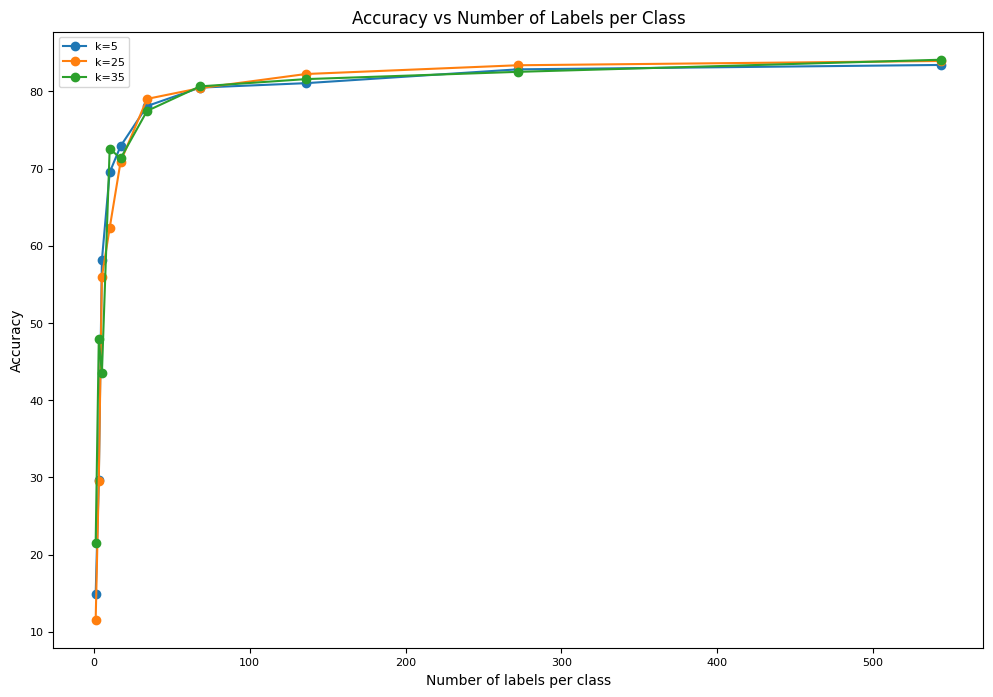

In [26]:
#Accuracy vs Number of Labels per class plot
plt.figure(figsize =(12, 8))
for k in k_values:
    plt.plot(label_counts, results[k]['accuracy'], label=f'k={k}', marker='o')

plt.title('Accuracy vs Number of Labels per Class', fontsize=12)
plt.xlabel('Number of labels per class', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.legend(fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

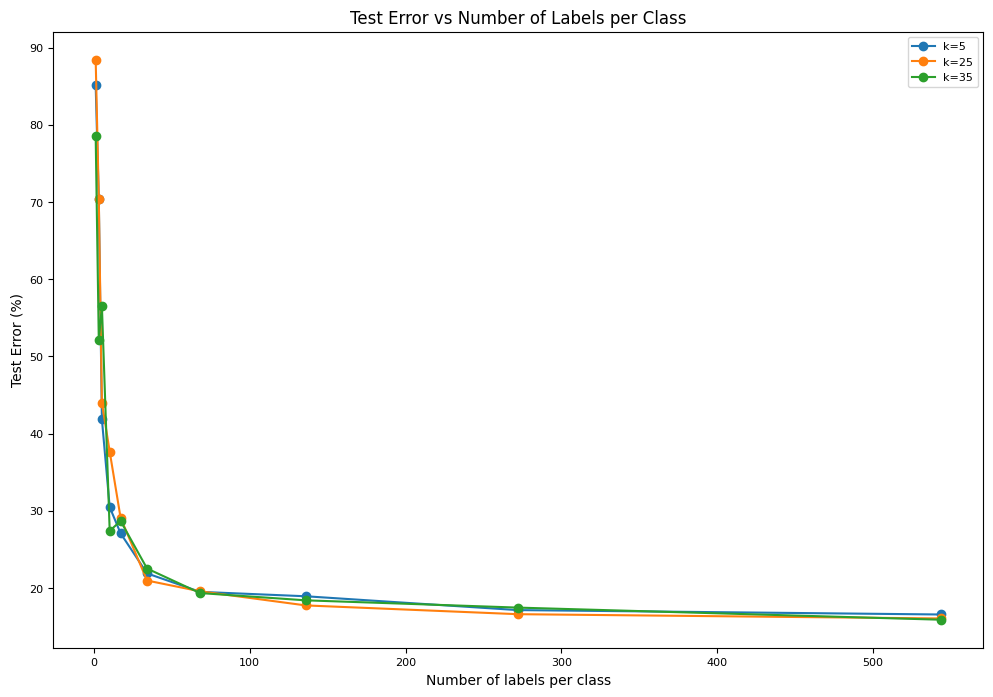

In [27]:
# Test error vs Number of Labels per class plot
plt.figure(figsize =(12, 8))
for k in k_values:
    plt.plot(label_counts, results[k]['Test_Error'], label=f'k={k}' , marker='o')

plt.title('Test Error vs Number of Labels per Class', fontsize=12)
plt.xlabel('Number of labels per class', fontsize=10)
plt.ylabel('Test Error (%)', fontsize=10)
plt.legend(fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

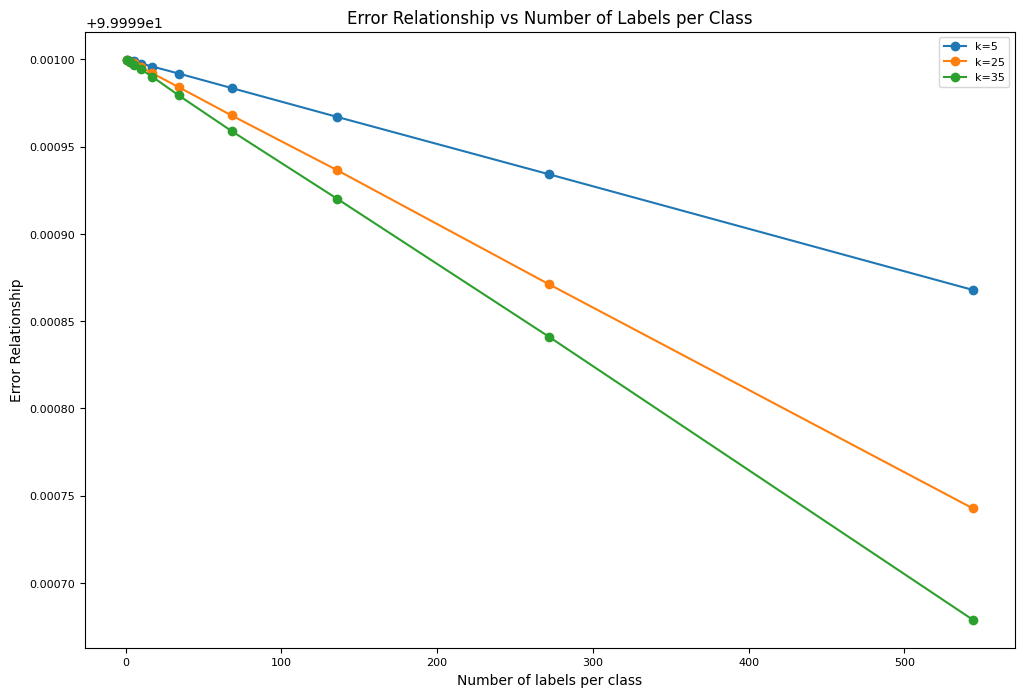

In [28]:
# Theoretically derived error vs number of labelled per class plot
plt.figure(figsize =(12, 8))
for k in k_values:
    plt.plot(label_counts, results[k]['test_error'], label=f'k={k}', marker='o')

plt.title('Error Relationship vs Number of Labels per Class', fontsize=12)
plt.xlabel('Number of labels per class', fontsize=10)
plt.ylabel('Error Relationship', fontsize=10)
plt.legend(fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()